# Basic Analysis

In this part, a basic analysis of the bibliographical information is done. The term 'basic'  refers to analyses that can be made by executing queries over a field of the dataframe.

In [1]:
import pandas as pd

In [2]:
records = pd.read_json('demo-keywords.json', orient='records', lines=True)

## Number of documents by document type

In [3]:
from techMiner import documentsByTerm

In [4]:
documentsByTerm(records, 'Document Type')

Document Type
Article              72
Book Chapter          5
Conference Paper     72
Conference Review     1
Note                  1
Review                5
dtype: int64

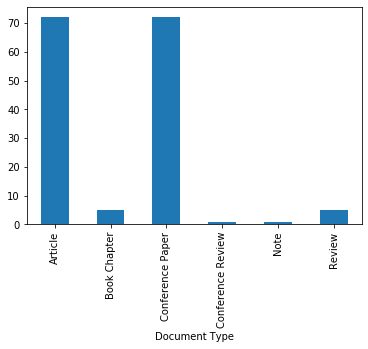

In [5]:
documentsByTerm(records, 'Document Type').plot.bar();

## Citations per document

In [6]:
documentsByTerm(records, 'Cited by')

Cited by
0      61
1      16
2      12
3      10
4       9
5       6
6       5
7      10
8       1
9       3
11      4
12      1
13      1
14      2
15      2
16      1
18      1
19      1
20      2
21      1
23      1
29      1
31      1
38      1
45      1
49      1
105     1
dtype: int64

## Number of authors per document

In [7]:
records['Num Authors'] = records['Author(s) ID'].map(lambda x: len(x.split(';')))
documentsByTerm(records, 'Num Authors')

Num Authors
1    21
2    54
3    41
4    24
5    11
6     5
dtype: int64

## Number of documents per source title

In [8]:
documentsByTerm(records, 'Source title').sort_values(ascending=False)

Source title
Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)    17
Quantitative Finance                                                                                                                     9
Expert Systems with Applications                                                                                                         9
Communications in Computer and Information Science                                                                                       4
Computational Economics                                                                                                                  3
                                                                                                                                        ..
Journal of Financial Markets                                                                                                             1
Journal of Inf

## Number of documents per author

In [9]:
documentsByTerm(records, 'Authors', sep=',').sort_values(ascending=False)

Authors
Maringer D.     5
Ng W.L.         4
Kablan A.       4
Montana G.      4
Arévalo A.      3
               ..
Orihara R.      1
Ortiz L.        1
Otero F.E.B.    1
O’Neill M.      1
Lin J.-Y.       1
Length: 356, dtype: int64

## Number of documents per keyword

In [10]:
documentsByTerm(records, 'Keywords', sep=';').sort_values(ascending=False)

Keywords
Algorithmic trading               37
High frequency trading            19
Automated trading                 15
Machine learning                  13
Deep learning                     11
                                  ..
Recurrent neural network (RNN)     1
Recursively updating               1
Regime-switching                   1
Rule discovery                     1
?-stable processes                 1
Length: 361, dtype: int64

## Documents per country

In [11]:
from techMiner import extractCountries

In [12]:
records['Country'] = records['Affiliations'].map(lambda x: extractCountries(x))
documentsByTerm(records, 'Country', sep=';').sort_values(ascending=False)[0:10]

Country
United Kingdom    42
China             36
United States     26
Brazil            12
Italy             10
Germany            9
Canada             8
Colombia           8
Spain              7
Russia             6
dtype: int64

## Number of documents per year

In [13]:
from techMiner import documentsByYear
documentsByYear(records)

,Documents,Year
1994,1,1994
1995,0,1995
1996,0,1996
1997,0,1997
1998,0,1998
1999,0,1999
2000,0,2000
2001,0,2001
2002,0,2002
2003,2,2003


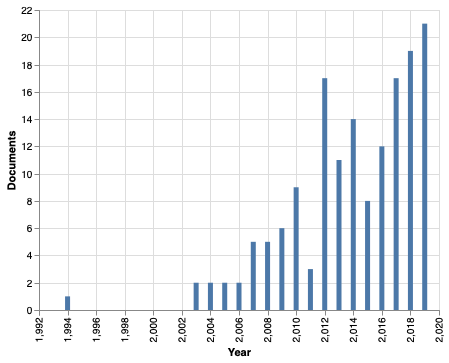

In [14]:
documentsByYear(records, plot=True)

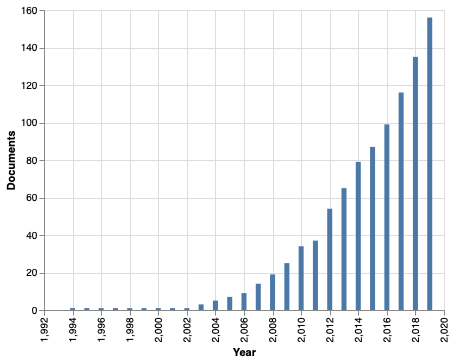

In [15]:
documentsByYear(records, plot=True, cumulative=True)

## Citations per year

In [16]:
from techMiner import citationsByYear
citationsByYear(records)

,Citations,Year
1994,3,1994
1995,0,1995
1996,0,1996
1997,0,1997
1998,0,1998
1999,0,1999
2000,0,2000
2001,0,2001
2002,0,2002
2003,49,2003


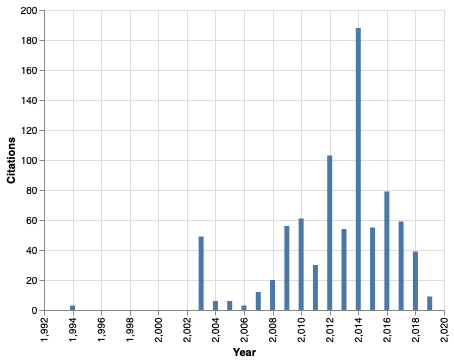

In [17]:
citationsByYear(records, plot=True)

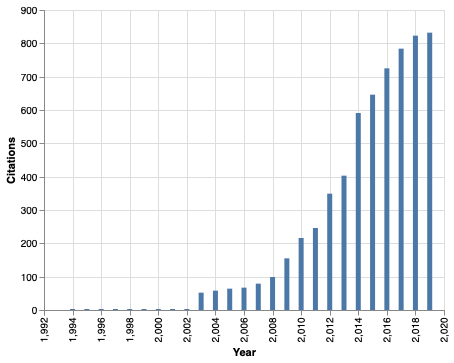

In [18]:
citationsByYear(records, plot=True, cumulative=True)

## Keywords per year

In [19]:
from techMiner import termByTerm

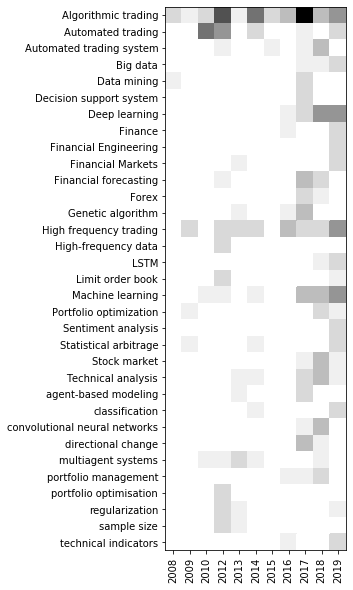

In [20]:
termByTerm(
    df=records, 
    termA='Keywords', 
    termB='Year', 
    sepA=';', 
    sepB=None, 
    ascendingA=True, 
    ascendingB=True, 
    minmax=(2,3), 
    plot=True)

In [28]:
termByTerm(
    df=records, 
    termA='Keywords', 
    termB='Year', 
    sepA=';', 
    sepB=None, 
    ascendingA=True, 
    ascendingB=True, 
    minmax=(2,3))

,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019
Algorithmic trading,2.0,1.0,2.0,6.0,1.0,5.0,2.0,3.0,8.0,3.0,4.0
Automated trading,0.0,0.0,5.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0
Automated trading system,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0
Big data,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
Data mining,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
Decision support system,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
Deep learning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,4.0
Finance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
Financial Engineering,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Financial Markets,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


In [22]:
##
## Keywords per Author
##
termByTerm(
    df=records, 
    termA='Authors', 
    termB='Keywords',
    sepA=',',
    sepB=';')

,Decision support system,Intelligent agents,Securities trading simulation,Web-services,Fibonacci geometry,Price patterns,Technical analysis,Trading systems,Argumentation,Data mining,...,Expert back testing systems,MACD optimization,Optimal historical data period selection,Evolutionary algorithms,Multi-objective,Independent component analysis,Mean reverting portfolio,Support vector machine,Behavioral finance,Investors’ mood
Wang Y.,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wang H.,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Deng J.,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zhao X.,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yung K.,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gao S.,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bhattacharya S.,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kumar K.,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Debenham J.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lawrence E.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
##
## Keywords per year
##
termByTerm(
    df=records, 
    termA='Keywords', 
    termB='Year', 
    sepA=';', 
    sepB=None)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Decision support system,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
Intelligent agents,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Securities trading simulation,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Web-services,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fibonacci geometry,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Price patterns,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Technical analysis,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,1.0
Trading systems,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Argumentation,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Data mining,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [24]:
##
## Document type per year
##
termByTerm(
    df=records, 
    termA='Document Type', 
    termB='Year', 
    sepA=None, 
    sepB=None)

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Conference Paper,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,8.0,1.0,6.0,2.0,7.0,4.0,4.0,12.0,8.0,5.0
Article,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,11.0,6.0,7.0,2.0,8.0,5.0,10.0,14.0
Review,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
Book Chapter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
Note,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Conference Review,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
##
## keywords per Year
##
termByTerm(
    df=records, 
    termA='Keywords', 
    termB='Year', 
    sepA=';', 
    sepB=None, 
    ascendingA=True, 
    ascendingB=False)

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
?-stable processes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANFIS,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANFIS ensemble,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adaptive GP trading system,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adaptive Neuro-fuzzy Inference system,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Adaptive systems,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agent based economics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aggressive strategy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algorithmic trading,4.0,3.0,8.0,3.0,2.0,5.0,1.0,6.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0


In [26]:
##
## Authors per Document Type
##
termByTerm(
    df=records, 
    termA='Authors', 
    termB='Document Type', 
    sepA=',', 
    sepB=None)

,Conference Paper,Article,Review,Book Chapter,Note,Conference Review
Silaghi G.C.,1.0,0.0,0.0,0.0,0.0,0.0
Robu V.,1.0,0.0,0.0,0.0,0.0,0.0
Wang Y.,1.0,0.0,0.0,0.0,0.0,0.0
Wang H.,1.0,0.0,0.0,0.0,0.0,0.0
Deng J.,1.0,0.0,0.0,0.0,0.0,0.0
Zhao X.,1.0,0.0,0.0,0.0,0.0,0.0
Yung K.,1.0,0.0,0.0,0.0,0.0,0.0
Gao S.,1.0,0.0,0.0,0.0,0.0,0.0
Bhattacharya S.,0.0,1.0,0.0,0.0,0.0,0.0
Kumar K.,0.0,1.0,0.0,0.0,0.0,0.0
